In [1]:
#  notebook for performing simulations and saving the results

# path where the data is saved, classes should correspond to folders in this directory
data_path = 'cifar100_reduced'

# specify whether augmentation should be performed for classes with only one image
perform_aug = False

# specify whether the data needs to be split into train and test set
perform_split = True

# select the model (pretrained on ImageNet) that should be used for transfer learning
# allowed values: ResNet, EffNet, MobNet
model_name = 'ResNet'

# select the size that the input images should be resized to
input_size = 224

# select the batch size used for training
batch_size = 16

# select the number of epochs
number_epochs = 100

# select the learning rate
learning_rate = 0.01

In [2]:
# import the necessary packages

import torch
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set device

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# create class embeddings (may take a few minutes)
# attention: at this point the only folders in the directory should be the one corresponding to the classes,
# remove all other folders

from Create_Class_Embeddings import create_class_embeddings

class_embeddings = create_class_embeddings(data_path)
class_embeddings = torch.from_numpy(class_embeddings).float().to(device)

C:\Users\marce\Python\Test\Create_Class_Embeddings.py:67: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  current_embedding = np.linalg.lstsq(matrix_prev_embeddings,distance_vector)[0]


In [5]:
# perform augmentation and create train/test set if necessary

from Augment_Data import augment_data
from Create_Train_Test import create_train_test

if perform_aug:
    augment_data(data_path)
    
if perform_split:
    create_train_test(data_path)

In [6]:
# create dataloaders for train and test set

from Create_Dataloaders import create_dataloaders

dataloaders_dict = create_dataloaders(data_path,input_size,batch_size)

In [7]:
# define model

from Select_Model import select_model

number_classes = class_embeddings.shape[0]
model_ft = None
model_ft = select_model(model_name,number_classes,device)

In [8]:
# select optimizer and scheduler

optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)
scheduler_ft = None

In [9]:
# train the model

from Train_Model import train_model

model_ft, hist = train_model(model_ft, dataloaders_dict, class_embeddings, optimizer_ft, scheduler_ft, device, number_epochs)

Epoch 1/100
----------


C:\Users\marce\anaconda3\envs\seminar\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train Loss: 0.8417 Acc: 0.0442
test Loss: 0.7561 Acc: 0.0800

Epoch 2/100
----------
train Loss: 0.7076 Acc: 0.1858
test Loss: 0.6831 Acc: 0.1400

Epoch 3/100
----------
train Loss: 0.6136 Acc: 0.3479
test Loss: 0.6190 Acc: 0.2000

Epoch 4/100
----------
train Loss: 0.5323 Acc: 0.5405
test Loss: 0.5824 Acc: 0.3000

Epoch 5/100
----------
train Loss: 0.4595 Acc: 0.7026
test Loss: 0.5690 Acc: 0.3500

Epoch 6/100
----------
train Loss: 0.3953 Acc: 0.8268
test Loss: 0.5490 Acc: 0.3400

Epoch 7/100
----------
train Loss: 0.3356 Acc: 0.9079
test Loss: 0.5560 Acc: 0.4300

Epoch 8/100
----------
train Loss: 0.2936 Acc: 0.9479
test Loss: 0.5467 Acc: 0.3800

Epoch 9/100
----------
train Loss: 0.2563 Acc: 0.9800
test Loss: 0.5335 Acc: 0.4400

Epoch 10/100
----------
train Loss: 0.2258 Acc: 0.9853
test Loss: 0.5335 Acc: 0.4100

Epoch 11/100
----------
train Loss: 0.2052 Acc: 0.9916
test Loss: 0.5408 Acc: 0.4200

Epoch 12/100
----------
train Loss: 0.1902 Acc: 0.9942
test Loss: 0.5367 Acc: 0.4200



test Loss: 0.4954 Acc: 0.4200

Epoch 97/100
----------
train Loss: 0.0245 Acc: 1.0000
test Loss: 0.4957 Acc: 0.4400

Epoch 98/100
----------
train Loss: 0.0248 Acc: 1.0000
test Loss: 0.4981 Acc: 0.4300

Epoch 99/100
----------
train Loss: 0.0245 Acc: 1.0000
test Loss: 0.4938 Acc: 0.4300

Epoch 100/100
----------
train Loss: 0.0250 Acc: 1.0000
test Loss: 0.4936 Acc: 0.4200

Training complete in 24m 56s
Best test Acc: 0.480000


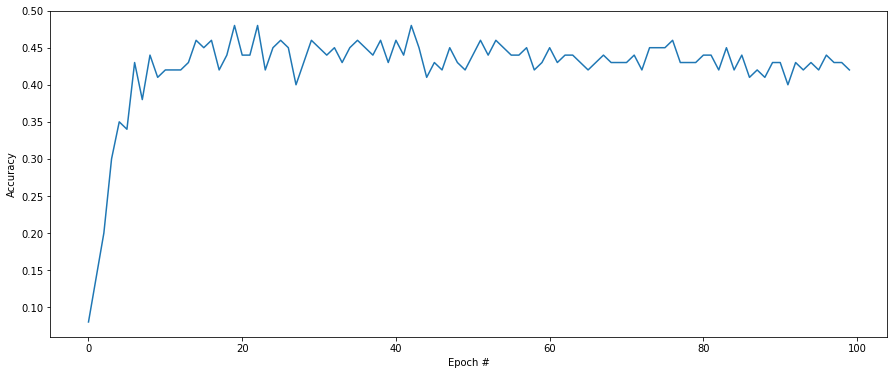

In [14]:
# plot the accuracy

plt.figure(figsize=(15, 6))
plt.plot(hist[0,:])
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')

plt.show()

In [11]:
# save the model

save_path = 'Model_' + model_name + '_' + str(input_size)+ '_' + str(batch_size)+ '_' + str(number_epochs)+ '_' + str(learning_rate)

torch.save(model_ft.state_dict(), save_path)

In [15]:
# save the history

save_path = 'History_' + model_name + '_' + str(input_size)+ '_' + str(batch_size)+ '_' + str(number_epochs)+ '_' + str(learning_rate) + '.json'

hist_values = []

for value in hist[0,:]:
    hist_values.append(value.item())
    
json.dump(hist_values, open(save_path, 'w'), indent=2) 